<a href="https://colab.research.google.com/github/LuisYurovich/Mentoria_16_Analisis_Inteligente_de_Jugadores/blob/main/Copia_de_TPN%C2%B03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Diplomatura en Ciencia de Datos
---
## Mentorias N°16. Grupo 2
## Analisis inteligente de jugadores de un reconocido juego electronico


# Trabajo Práctico 2

**Integrantes:**


* Luis Federico Yurovich

* Nicolás Nazareno Rosales

* Rocío Martinez

###Lo primero que hacemos es cargar todas las librerias e importar el dataset trabajado en el entregable anterior para empezar a trabajar.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.linear_model import LogisticRegression


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBRegressor, XGBRFRegressor, XGBClassifier, XGBRFClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url="/content/drive/Shareddrives/Análisis Inteligente de Jugadores de Reconocido Juego Electrónico/Rocio-Luis-Nicolas/TP N°3 /df_sn.csv"
df= pd.read_csv(url, sep = ',', index_col= 0)

###Se puede notar que se han renombrado a los jugadores

In [ ]:
df.sort_values(by='max_cups').head()

,id,number_of_records,has_studies,country,gender,state,year_of_birth,max_cups,age_aprox
837,Player-838,4390,f,Argentina,Hombre,Buenos Aires,1991.0,239,31.0
782,Player-783,3528,t,Argentina,Hombre,Buenos Aires,1991.0,327,31.0
1082,Player-1083,73,t,Argentina,Hombre,Buenos Aires,2002.0,562,20.0
1185,Player-1186,5646,f,Argentina,Hombre,Buenos Aires,1994.0,578,28.0
604,Player-605,570,f,Venezuela,Hombre,Aragua,1987.0,579,35.0


##Sección 1: Preparación

**(1) ¿Cuál será la variable target para predecir? Elegir una o generar una a partir de los datos.**

###Para estudiar el desempeño de un buen jugador se decdió no tener en cuenta las variables 'gender' ni 'country', si bien hay predominancia de hombres argentinos y venezolanos, respectivamente, asumimos que no influyen en el desempeño ya que hay jugadores de otros países que suponemos que tienen un buen desempeño. Excluímos el 'id' también, ya que el *nombre* no determina la calidad de juego. De la misma manera no tendremos en cuenta las variables 'has_studies','state' y 'year_of_birth'.

### Primero nos quedamos con los jugadores con más de 100 registros ya que un jugador puede haber conseguido un alto número de copas en pocos registros, y con eso no podemos ver una regularidad ya que podría ser *suerte de principiante*. Luego recategorizamos teniendo en cuenta el máximo de copas ganadas, basandonos en ello para asumir el desempeño los jugadores. Las categorias son: **D** para jugadores con menos de 500 copas (mal jugador), **C** para menos de 1000 copas (jugador regular), **B** para menos de 1500 copas (buen jugador) y **A** para más de 1500 copas (excelente jugador).

In [ ]:
df_target = df.copy()

In [ ]:
df_target = df_target.assign(category = 'A')
df_target

,id,number_of_records,has_studies,country,gender,state,year_of_birth,max_cups,age_aprox,category
0,Player-1,868,t,Venezuela,Hombre,Miranda,1997.0,1211,25.0,A
1,Player-2,4199,t,Venezuela,Hombre,Miranda,2003.0,1559,19.0,A
2,Player-3,7243,t,Argentina,Hombre,Chubut,1996.0,1859,26.0,A
3,Player-4,1326,t,Venezuela,Hombre,Anzoategui,1996.0,1221,26.0,A
4,Player-5,869,t,Argentina,Hombre,Buenos Aires,1995.0,1200,27.0,A
...,...,...,...,...,...,...,...,...,...,...
1427,Player-1428,9395,t,Venezuela,Hombre,Monagas,2000.0,1724,22.0,A
1428,Player-1429,15228,t,Argentina,Hombre,Buenos Aires,2000.0,1856,22.0,A
1429,Player-1430,47,t,Argentina,Hombre,Buenos Aires,2003.0,1176,19.0,A
1430,Player-1431,1505,t,Argentina,Hombre,Buenos Aires,1997.0,1421,25.0,A


In [ ]:
df_cat = df_target.loc[df_target.number_of_records >= 100 ]

In [ ]:
df_cat.loc[df.max_cups < 1500 , 'category'] = 'B'
df_cat.loc[df.max_cups < 1000, 'category'] = 'C'
df_cat.loc[df.max_cups < 500 , 'category'] = 'D'
df_cat

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,id,number_of_records,has_studies,country,gender,state,year_of_birth,max_cups,age_aprox,category
0,Player-1,868,t,Venezuela,Hombre,Miranda,1997.0,1211,25.0,B
1,Player-2,4199,t,Venezuela,Hombre,Miranda,2003.0,1559,19.0,A
2,Player-3,7243,t,Argentina,Hombre,Chubut,1996.0,1859,26.0,A
3,Player-4,1326,t,Venezuela,Hombre,Anzoategui,1996.0,1221,26.0,B
4,Player-5,869,t,Argentina,Hombre,Buenos Aires,1995.0,1200,27.0,B
...,...,...,...,...,...,...,...,...,...,...
1426,Player-1427,883,f,Venezuela,Hombre,Miranda,1988.0,1371,34.0,B
1427,Player-1428,9395,t,Venezuela,Hombre,Monagas,2000.0,1724,22.0,A
1428,Player-1429,15228,t,Argentina,Hombre,Buenos Aires,2000.0,1856,22.0,A
1430,Player-1431,1505,t,Argentina,Hombre,Buenos Aires,1997.0,1421,25.0,B


In [ ]:
df_cat.category.value_counts()

B    762
A    542
C     55
D      2
Name: category, dtype: int64

####Es importante notar que solo contamos con dos jugadores de categoría D

**(2) ¿Cuáles serán las variables de entrada?**

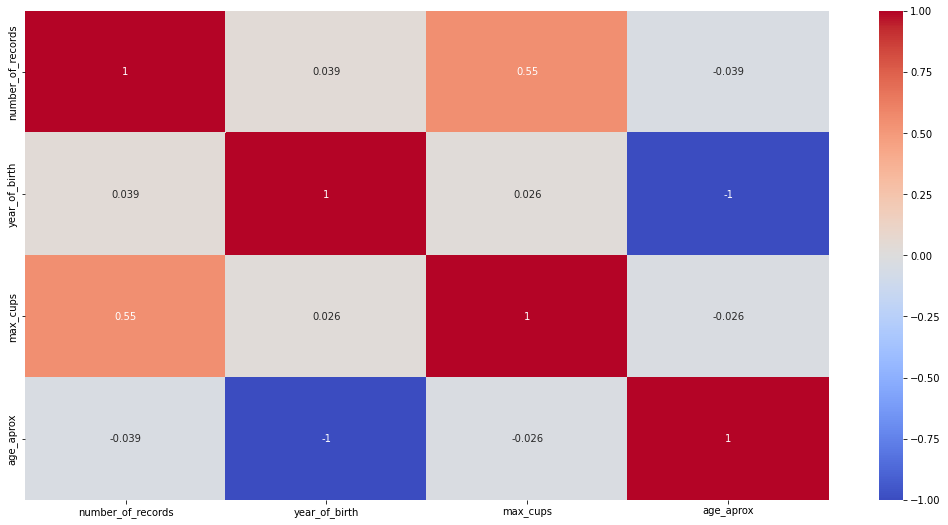

In [ ]:
plt.figure(figsize=(18, 9))
sns.heatmap(df_cat.corr(), cmap="coolwarm", annot=True)
plt.show()

<Figure size 1296x648 with 0 Axes>

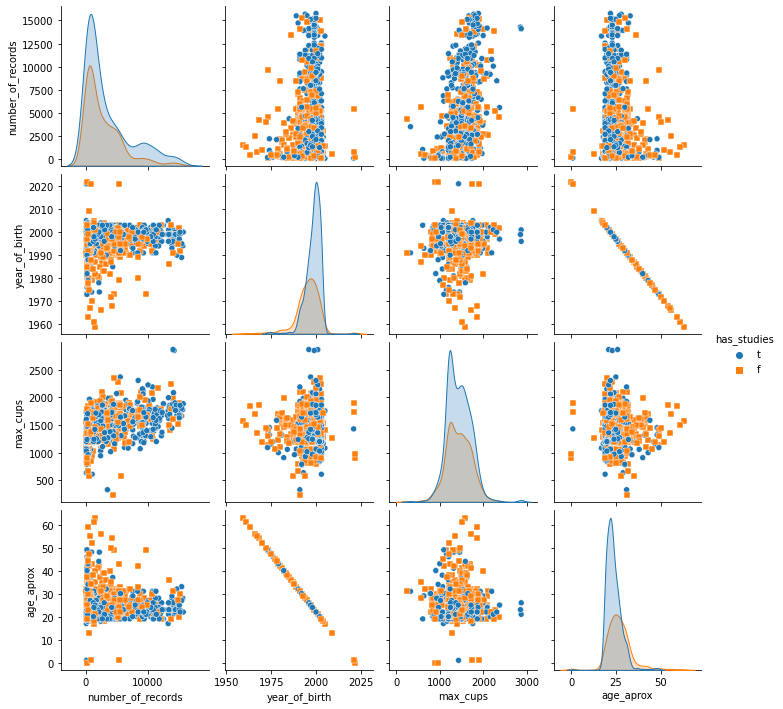

In [ ]:
plt.figure(figsize=(18, 9))
sns.pairplot(data=df_cat, hue="has_studies", markers=["o", "s"])
plt.show()

###Con estos gráficos se observa una correlación entre las variables 'number_of_records' y 'max_cups'. Es por esto que se tomó la decisión de darle mayor importancia a estas variables, dejando también la edad aproximada para poder ver cómo predice nuestro algoritmo.

In [ ]:
X = df_cat.drop(columns = "category")
y = df_cat.category

In [ ]:
X = X.drop(columns = ['id','has_studies','country','gender','state','year_of_birth'])

In [ ]:
from sklearn.model_selection import train_test_split

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset


# In the first step we will split the data in training and remaining dataset
x_train, x_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8,random_state=100)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5, random_state=100)

print(x_train.shape), print(y_train.shape)
print(x_valid.shape), print(y_valid.shape)
print(x_test.shape), print(y_test.shape)

(1088, 3)
(1088,)
(136, 3)
(136,)
(137, 3)
(137,)


(None, None)

In [ ]:
def tune_model_random(clf, param_grid, 
               x_train, x_test, 
               y_train, y_test):
  cvc = RandomizedSearchCV(clf, param_grid, n_iter = 30,cv = 5, scoring = "accuracy", n_jobs = -1)
  cvc.fit(x_train, y_train)

  results = cvc.cv_results_
  df_results = pd.DataFrame(results)

  display(df_results.sort_values('rank_test_score'))


  train_predictions = cvc.predict(x_train)
  accuracy = accuracy_score(y_train, train_predictions)
  print(f"Accuracy train {np.round(accuracy * 100.0,1)}%")

  test_predictions = cvc.predict(x_test)
  accuracy = accuracy_score(y_test, test_predictions)
  print(f"Accuracy test {np.round(accuracy * 100.0,1)}%")

  print("\n Train")
  plot_confusion_matrix(cvc,x_train,y_train, normalize = 'true')

  print("\n Test")
  plot_confusion_matrix(cvc,x_test,y_test, normalize = 'true')

  return cvc

## Random Forest

In [ ]:
clf_rforest = RandomForestClassifier(random_state=100)
rforest_grid = { 
    'n_estimators': [100,200, 350,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,8, 15, 30, None],
    'criterion' :['gini', 'entropy']
}

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.868439,0.014420,0.075304,0.004007,350,auto,None,gini,"{'n_estimators': 350, 'max_features': 'auto', ...",1.0,0.995413,0.995413,0.990783,1.000000,0.996322,0.003446,1
18,0.853358,0.005954,0.070253,0.001660,350,auto,8,gini,"{'n_estimators': 350, 'max_features': 'auto', ...",1.0,0.995413,0.995413,0.990783,1.000000,0.996322,0.003446,1
17,0.249117,0.004655,0.022582,0.000365,100,log2,30,gini,"{'n_estimators': 100, 'max_features': 'log2', ...",1.0,0.995413,0.995413,0.990783,1.000000,0.996322,0.003446,1
16,0.250168,0.005958,0.025776,0.006273,100,log2,15,gini,"{'n_estimators': 100, 'max_features': 'log2', ...",1.0,0.995413,0.995413,0.990783,1.000000,0.996322,0.003446,1
23,1.214097,0.007638,0.115421,0.017560,500,sqrt,None,gini,"{'n_estimators': 500, 'max_features': 'sqrt', ...",1.0,0.995413,0.995413,0.990783,1.000000,0.996322,0.003446,1
24,0.847659,0.005893,0.072324,0.003209,350,auto,15,gini,"{'n_estimators': 350, 'max_features': 'auto', ...",1.0,0.995413,0.995413,0.990783,1.000000,0.996322,0.003446,1
13,0.854714,0.016863,0.075161,0.004098,350,auto,30,gini,"{'n_estimators': 350, 'max_features': 'auto', ...",1.0,0.995413,0.995413,0.990783,1.000000,0.996322,0.003446,1
12,0.923354,0.011492,0.078719,0.009211,350,auto,8,entropy,"{'n_estimators': 350, 'max_features': 'auto', ...",1.0,0.995413,0.995413,0.990783,1.000000,0.996322,0.003446,1
11,1.179742,0.015634,0.104711,0.010414,500,auto,5,gini,"{'n_estimators': 500, 'max_features': 'auto', ...",1.0,0.995413,0.995413,0.990783,1.000000,0.996322,0.003446,1
19,1.343966,0.007516,0.105770,0.006548,500,sqrt,30,entropy,"{'n_estimators': 500, 'max_features': 'sqrt', ...",1.0,0.995413,0.995413,0.990783,1.000000,0.996322,0.003446,1


Accuracy train 100.0%
Accuracy test 100.0%

 Train


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



 Test


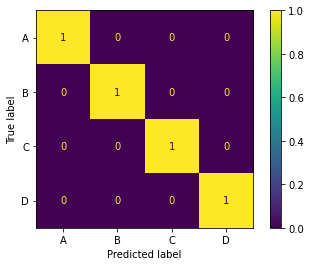

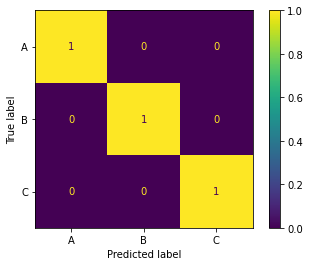

In [ ]:
cvc = tune_model_random(clf_rforest,
           rforest_grid,
            x_train, x_test, 
            y_train, y_test)

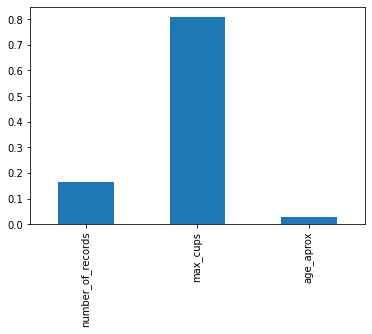

In [ ]:
#cvc.best_estimator_.coef_
bestcoef = pd.Series(cvc.best_estimator_.feature_importances_, index = X.columns)
bestcoef.plot(kind="bar")

In [ ]:
def tune_model(clf, param_grid, 
               x_train, x_test, 
               y_train, y_test):
  cvc = GridSearchCV(clf, param_grid, cv = 5, scoring = "accuracy", n_jobs = -1)
  cvc.fit(x_train, y_train)

  results = cvc.cv_results_
  df_results = pd.DataFrame(results)

  display(df_results.sort_values('rank_test_score'))


  train_predictions = cvc.predict(x_train)
  accuracy = accuracy_score(y_train, train_predictions)
  print(f"Accuracy train {np.round(accuracy * 100.0,1)}%")

  test_predictions = cvc.predict(x_test)
  accuracy = accuracy_score(y_test, test_predictions)
  print(f"Accuracy test {np.round(accuracy * 100.0,1)}")

  print("\n Train")
  plot_confusion_matrix(cvc,x_train,y_train, normalize = 'true')

  print("\n Test")
  plot_confusion_matrix(cvc,x_test,y_test, normalize = 'true')

  return cvc

## Regresión Logística

In [ ]:
Logist_regr_clf = LogisticRegression(random_state=100)

In [ ]:
C = np.logspace(-4, 4, 10)
penalty = ['l1', 'l2']
max_iter = [100,200]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

parameters_log_regr = dict(C=C,
                  penalty=penalty,
                  max_iter = max_iter,
                  solver = solver)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solve

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
135,1.141435,0.064528,0.002852,0.000133,21.544347,200,l2,newton-cg,"{'C': 21.54434690031882, 'max_iter': 200, 'pen...",0.995413,1.000000,0.995413,0.990783,0.995392,0.995400,0.002915,1
175,1.135379,0.078173,0.002820,0.000120,1291.549665,200,l2,newton-cg,"{'C': 1291.5496650148827, 'max_iter': 200, 'pe...",0.995413,1.000000,0.995413,0.990783,0.995392,0.995400,0.002915,1
55,1.147350,0.073557,0.002944,0.000205,0.005995,200,l2,newton-cg,"{'C': 0.005994842503189409, 'max_iter': 200, '...",0.995413,0.990826,0.995413,0.995392,0.995392,0.994487,0.001831,3
75,1.136662,0.051596,0.004077,0.002078,0.046416,200,l2,newton-cg,"{'C': 0.046415888336127774, 'max_iter': 200, '...",0.995413,0.990826,0.995413,0.995392,0.995392,0.994487,0.001831,3
95,1.159342,0.086232,0.003593,0.001502,0.359381,200,l2,newton-cg,"{'C': 0.3593813663804626, 'max_iter': 200, 'pe...",0.995413,0.990826,0.995413,0.995392,0.995392,0.994487,0.001831,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.000783,0.000110,0.000000,0.000000,0.046416,100,l1,newton-cg,"{'C': 0.046415888336127774, 'max_iter': 100, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,196
61,0.000923,0.000266,0.000000,0.000000,0.046416,100,l1,lbfgs,"{'C': 0.046415888336127774, 'max_iter': 100, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,197
63,0.000858,0.000096,0.000000,0.000000,0.046416,100,l1,sag,"{'C': 0.046415888336127774, 'max_iter': 100, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,198
51,0.000822,0.000075,0.000000,0.000000,0.005995,200,l1,lbfgs,"{'C': 0.005994842503189409, 'max_iter': 200, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,199


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy train 99.8%
Accuracy test 100.0

 Train

 Test


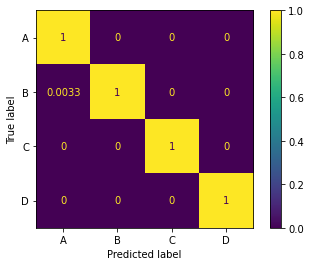

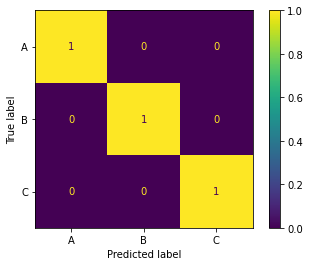

In [ ]:
cvc = tune_model(Logist_regr_clf, parameters_log_regr, 
               x_train, x_test, 
               y_train, y_test)

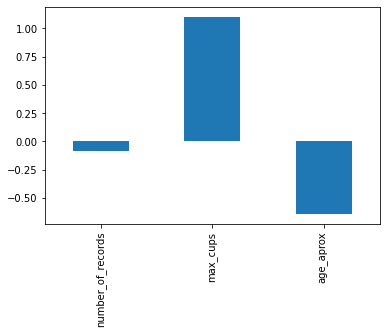

In [ ]:
#cvc.best_estimator_.coef_
bestcoef = pd.Series(cvc.best_estimator_.coef_[0], index = X.columns)
bestcoef.plot(kind="bar")

## Gradient Boosting

In [ ]:
from xgboost import XGBClassifier, XGBRFClassifier
xgb_clf = XGBClassifier(random_state = 100)

xgboost_grid = dict(objective =['reg:squarederror', 'reg:logistic'],
                         colsample_bytree = [0.1,0.3,0.6],
                         learning_rate = [0.01, 0.1, 0.2, 0.5],
                         max_depth = [2,3,5,7,10], 
                         alpha = [20, 50, 100], 
                         n_estimators = [5,10, 50,100,250])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_objective,param_n_estimators,param_max_depth,param_learning_rate,param_colsample_bytree,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.081780,0.007926,0.003945,0.000204,reg:squarederror,50,5,0.2,0.1,50,"{'objective': 'reg:squarederror', 'n_estimator...",1.000000,1.000000,0.995413,0.995392,1.000000,0.998161,0.002252,1
27,0.274210,0.015777,0.009884,0.001120,reg:logistic,250,5,0.1,0.3,20,"{'objective': 'reg:logistic', 'n_estimators': ...",1.000000,1.000000,0.995413,0.995392,1.000000,0.998161,0.002252,1
26,0.146471,0.011496,0.006113,0.000336,reg:squarederror,100,5,0.1,0.1,100,"{'objective': 'reg:squarederror', 'n_estimator...",1.000000,1.000000,0.995413,0.995392,1.000000,0.998161,0.002252,1
25,0.107474,0.003077,0.004047,0.000098,reg:logistic,100,7,0.5,0.3,50,"{'objective': 'reg:logistic', 'n_estimators': ...",1.000000,1.000000,0.995413,0.995392,1.000000,0.998161,0.002252,1
23,0.076344,0.004237,0.004025,0.000219,reg:logistic,50,5,0.2,0.3,100,"{'objective': 'reg:logistic', 'n_estimators': ...",1.000000,1.000000,0.995413,0.995392,1.000000,0.998161,0.002252,1
22,0.309494,0.009935,0.011381,0.003084,reg:logistic,250,7,0.1,0.3,50,"{'objective': 'reg:logistic', 'n_estimators': ...",1.000000,1.000000,0.995413,0.995392,1.000000,0.998161,0.002252,1
20,0.068427,0.005992,0.003341,0.000105,reg:squarederror,50,3,0.1,0.6,50,"{'objective': 'reg:squarederror', 'n_estimator...",1.000000,1.000000,0.995413,0.995392,1.000000,0.998161,0.002252,1
17,0.133879,0.004128,0.005312,0.000314,reg:logistic,100,5,0.2,0.1,20,"{'objective': 'reg:logistic', 'n_estimators': ...",1.000000,1.000000,0.995413,0.995392,1.000000,0.998161,0.002252,1
15,0.315396,0.016915,0.010080,0.000461,reg:logistic,250,10,0.1,0.1,50,"{'objective': 'reg:logistic', 'n_estimators': ...",1.000000,1.000000,0.995413,0.995392,1.000000,0.998161,0.002252,1
12,0.098373,0.005448,0.004008,0.000248,reg:logistic,100,5,0.5,0.1,100,"{'objective': 'reg:logistic', 'n_estimators': ...",1.000000,1.000000,0.995413,0.995392,1.000000,0.998161,0.002252,1


Accuracy train 100.0%
Accuracy test 100.0%

 Train

 Test


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


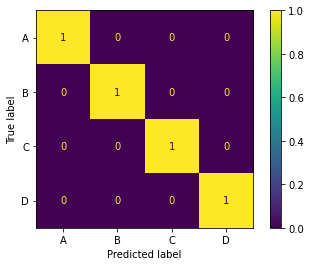

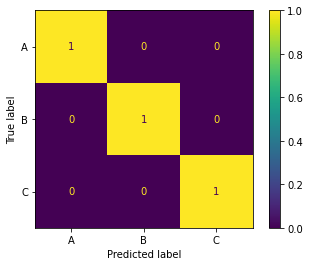

In [ ]:
cvc = tune_model_random(xgb_clf,
           xgboost_grid,
            x_train, x_test, 
            y_train, y_test)

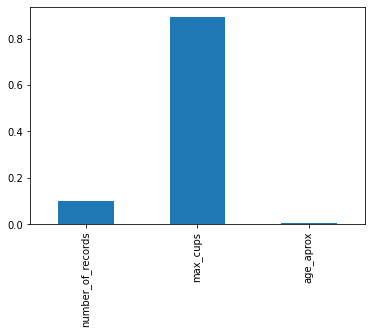

In [ ]:
#cvc.best_estimator_.feature_importance()
bestcoef = pd.Series(cvc.best_estimator_.feature_importances_, index = X.columns)
bestcoef.plot(kind="bar")

###Cómo se puede ver, nuestro modelo clasifica bastante bien los jugadores en las category que les corresponden. Asimismo, hay que tener en cuenta que en el dataset contábamos solo con dos registros de jugadores en categoría *D, lo que puede significar que ambos caigan en el grupo de entrenamiento y no en el de validación, lo cual no nos deja ver cómo clasificaría otro *mal jugador. Otro problema sería si ambos valores están en el de validación, lo que significa que nunca pudo entrenar con una categoría fuera de las *A, **B* y *C*.